In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv('LASDF_ss.csv')
print(data.columns)

wells=data.W.unique()

print(wells)
print(len(wells))

Index(['Unnamed: 0', 'LITHOLOGY_GEOLINK', 'W', 'CALI', 'DRHO', 'NPHI', 'RHOB',
       'GR', 'DTC', 'RDEP', 'SP', 'RSHA', 'RMED', 'UWI', 'MD'],
      dtype='object')
['15_9-12.las' '15_9-13.las' '15_9-14.las' '15_9-15.las' '15_9-17.las'
 '15_9-18.las' '15_9-19 A.las' '15_9-19 B.las' '15_9-2.las' '15_9-22.las'
 '15_9-23.las' '15_9-4.las' '15_9-5.las' '15_9-7.las' '15_9-8.las'
 '15_9-9.las' '16_1-2.las' '16_1-6 A.las' '16_10-1.las' '16_10-2.las'
 '16_10-3.las' '16_10-4.las' '16_10-5.las' '16_11-1 S.las' '16_11-2.las'
 '16_2-11 A.las' '16_2-16.las' '16_2-6.las' '16_2-7.las' '16_4-1.las'
 '16_4-2.las' '16_5-3.las' '16_6-1.las' '16_7-1.las' '16_7-2.las'
 '16_7-3.las' '16_7-4.las' '16_7-5.las' '16_7-6.las' '16_7-7 S.las'
 '16_7-8 S.las' '16_8-1.las' '16_9-1.las' '17_11-1.las' '17_4-1.las'
 '24_12-2.las' '25_10-10.las' '25_10-2 R.las' '25_10-3.las'
 '25_10-4 R.las' '25_10-8 A.las' '25_10-8.las' '25_10-9.las' '25_11-1.las'
 '25_11-15.las' '25_11-19 S.las' '25_11-23.las' '25_11-24.las'
 '25_11-5

In [3]:
def rolling_window(a, window):
    a
    shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
    strides = a.strides + (a.strides[-1],)
    rolled = np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)
    return rolled

# Despike function
def despike(df,curve, z,window):
    
    
    
    
    temp=df.fillna(-1)

    
    
    
    curve=temp[curve].values
    print('curve:',len(curve))
      # Transform to curve's units
    #curve_sm = np.median(rolling_window(curve,window),-1)
    curve_sm = np.full_like(curve, 0)
    curve_sm[window//2:-window//2+1] = np.median(rolling_window(curve,window),-1)
    
    print('curve_sm:',len(curve_sm))
    z *= np.nanstd(curve)
    
    
    
    spikes = np.where((curve - curve_sm) > z)[0]
    spukes = np.where((curve_sm - curve) > z)[0]
    out = np.copy(curve)
    #params = curve.__dict__.copy()
    out[spikes] = curve_sm[spikes] + z  # Clip at the max allowed diff
    out[spukes] = curve_sm[spukes] - z  # Clip at the min allowed diff
    

    return out




In [8]:
logs=['NPHI', 'RHOB', 'DTC']

    
#print(data['RHOB'].values)
#despike=pd.DataFrame()

#well=pd.DataFrame()
#for l in range(len(logs)):
 #   well[edit_labels[l]]=0

    
dfs=[]
#print(well.columns)
for w in wells:
    print(w)
    well=data[data['W']==w]
    for l in logs:
                 
        #print(well.W.unique())
        curve=well[l].values
        #print(well)
        well['{}_edit'.format(l)]=despike(df=well,curve=l,z=2,window=50)
        dfs.append(well)
    
    
data_edit = pd.concat(dfs)
    
#data_edit.plot(x='MD',y=['RHOB','RHOB_edit'],)
#print('orign:',len(data_edit.NPHI.values))
#print('edit:',len(data_edit.NPHI_edit.values))

15_9-12.las
curve: 21386
curve_sm: 21386
curve: 21386
curve_sm: 21386
curve: 21386
curve_sm: 21386


C:\Users\danie\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


15_9-13.las
curve: 18297
curve_sm: 18297
curve: 18297
curve_sm: 18297
curve: 18297
curve_sm: 18297
15_9-14.las
curve: 20311
curve_sm: 20311
curve: 20311
curve_sm: 20311
curve: 20311
curve_sm: 20311
15_9-15.las
curve: 17864
curve_sm: 17864
curve: 17864
curve_sm: 17864
curve: 17864
curve_sm: 17864
15_9-17.las
curve: 17373
curve_sm: 17373
curve: 17373
curve_sm: 17373
curve: 17373
curve_sm: 17373
15_9-18.las
curve: 28091
curve_sm: 28091
curve: 28091
curve_sm: 28091
curve: 28091
curve_sm: 28091
15_9-19 A.las
curve: 12994
curve_sm: 12994
curve: 12994
curve_sm: 12994
curve: 12994
curve_sm: 12994
15_9-19 B.las
curve: 6984
curve_sm: 6984
curve: 6984
curve_sm: 6984
curve: 6984
curve_sm: 6984
15_9-2.las
curve: 22149
curve_sm: 22149
curve: 22149
curve_sm: 22149
curve: 22149
curve_sm: 22149
15_9-22.las
curve: 10401
curve_sm: 10401
curve: 10401
curve_sm: 10401
curve: 10401
curve_sm: 10401
15_9-23.las
curve: 11121
curve_sm: 11121
curve: 11121
curve_sm: 11121
curve: 11121
curve_sm: 11121
15_9-4.las
cu

curve: 21896
curve_sm: 21896
curve: 21896
curve_sm: 21896
curve: 21896
curve_sm: 21896
30_3-3.las
curve: 21232
curve_sm: 21232
curve: 21232
curve_sm: 21232
curve: 21232
curve_sm: 21232
30_3-4 R.las
curve: 21703
curve_sm: 21703
curve: 21703
curve_sm: 21703
curve: 21703
curve_sm: 21703
30_3-5 S.las
curve: 4396
curve_sm: 4396
curve: 4396
curve_sm: 4396
curve: 4396
curve_sm: 4396
30_4-1.las
curve: 29398
curve_sm: 29398
curve: 29398
curve_sm: 29398
curve: 29398
curve_sm: 29398
30_4-2.las
curve: 24229
curve_sm: 24229
curve: 24229
curve_sm: 24229
curve: 24229
curve_sm: 24229
30_6-11.las
curve: 24695
curve_sm: 24695
curve: 24695
curve_sm: 24695
curve: 24695
curve_sm: 24695
30_6-14.las
curve: 15282
curve_sm: 15282
curve: 15282
curve_sm: 15282
curve: 15282
curve_sm: 15282
30_6-19.las
curve: 609
curve_sm: 609
curve: 609
curve_sm: 609
curve: 609
curve_sm: 609
30_6-22.las
curve: 3726
curve_sm: 3726
curve: 3726
curve_sm: 3726
curve: 3726
curve_sm: 3726
30_6-23.las
curve: 18858
curve_sm: 18858
curve:

curve: 33772
curve_sm: 33772
34_7-16.las
curve: 332
curve_sm: 332
curve: 332
curve_sm: 332
curve: 332
curve_sm: 332
34_7-20.las
curve: 18146
curve_sm: 18146
curve: 18146
curve_sm: 18146
curve: 18146
curve_sm: 18146
34_7-21.las
curve: 22451
curve_sm: 22451
curve: 22451
curve_sm: 22451
curve: 22451
curve_sm: 22451
34_7-5.las
curve: 22193
curve_sm: 22193
curve: 22193
curve_sm: 22193
curve: 22193
curve_sm: 22193
34_8-1.las
curve: 17920
curve_sm: 17920
curve: 17920
curve_sm: 17920
curve: 17920
curve_sm: 17920
34_8-3.las
curve: 13485
curve_sm: 13485
curve: 13485
curve_sm: 13485
curve: 13485
curve_sm: 13485
34_8-6.las
curve: 10605
curve_sm: 10605
curve: 10605
curve_sm: 10605
curve: 10605
curve_sm: 10605
34_8-7.las
curve: 14862
curve_sm: 14862
curve: 14862
curve_sm: 14862
curve: 14862
curve_sm: 14862
35_10-1.las
curve: 386
curve_sm: 386
curve: 386
curve_sm: 386
curve: 386
curve_sm: 386
35_10-2.las
curve: 353
curve_sm: 353
curve: 353
curve_sm: 353
curve: 353
curve_sm: 353
35_11-1.las
curve: 155

In [10]:
print(data_edit.head())

   Unnamed: 0  LITHOLOGY_GEOLINK            W       CALI   DRHO  NPHI   RHOB  \
0           0                NaN  15_9-12.las  19.406000 -0.708   NaN  1.789   
1           1                NaN  15_9-12.las  19.406000 -0.722   NaN  1.754   
2           2                NaN  15_9-12.las  19.406000 -0.620   NaN  1.778   
3           3                NaN  15_9-12.las  19.452999 -0.648   NaN  1.642   
4           4                NaN  15_9-12.las  19.452999 -0.685   NaN  1.563   

          GR         DTC      RDEP        SP      RSHA      RMED  UWI  \
0  64.497482  167.582153  1.574993  0.694700  1.546029  1.546029  NaN   
1  62.406261  167.425064  1.569011  0.445339  1.570030  1.570030  NaN   
2  62.629055  167.808395  1.578010  0.727901  1.594994  1.594994  NaN   
3  65.998596  169.244873  1.586024  1.474898  1.589930  1.589930  NaN   
4  64.997223  170.635086  1.603011 -0.023000  1.540016  1.540016  NaN   

           MD  NPHI_edit  RHOB_edit   DTC_edit  
0  493.493134       -1.0   0.44

In [13]:
data_edit.to_csv('data_despike.csv')

KeyboardInterrupt: 

orign: 9441486
edit: 9441486


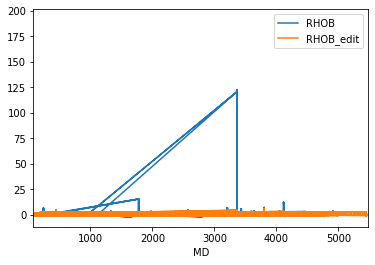

In [11]:
data_edit.plot(x='MD',y=['RHOB','RHOB_edit'],)
print('orign:',len(data_edit.NPHI.values))
print('edit:',len(data_edit.NPHI_edit.values))